In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
data.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

## Exploratory Data Analysis

In [4]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [5]:
num_data = data._get_numeric_data()
num_data.budget = num_data.budget.replace(0,np.nan)
num_data.budget = np.log(num_data.budget)
num_data.revenue = np.log(num_data.revenue)
num_data.drop(columns=['id'],inplace=True)
num_data.columns = ['log_budget','popularity','runtime','log_revenue']
num_data

,log_budget,popularity,runtime,log_revenue
0,16.454568,6.575393,93.0,16.326300
1,17.504390,8.248895,113.0,18.370959
2,15.009433,64.299990,105.0,16.387512
3,13.997832,3.174936,122.0,16.588099
4,NaN,1.148070,118.0,15.182614
...,...,...,...,...
2995,NaN,9.853270,102.0,14.283441
2996,NaN,3.727996,102.0,12.103985
2997,17.989898,14.482345,120.0,18.309266
2998,17.553180,15.725542,90.0,18.962792


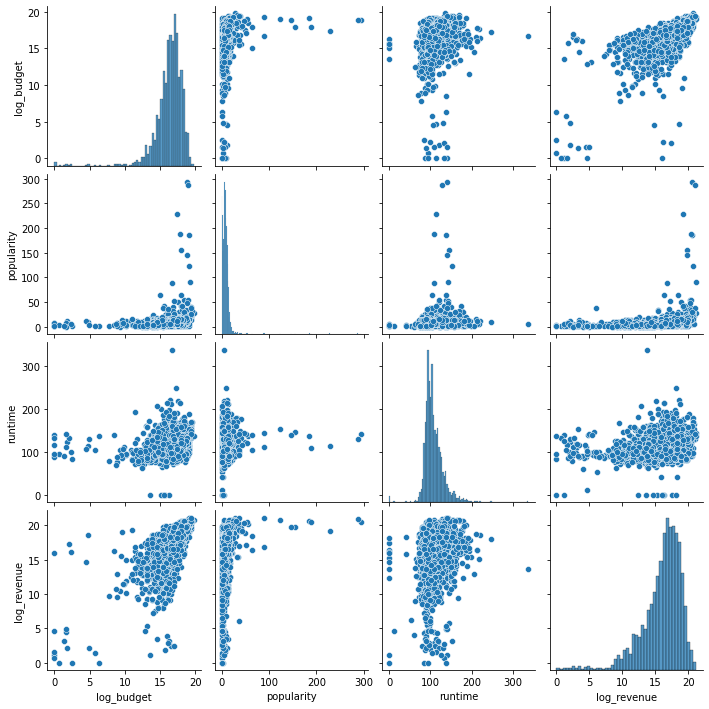

In [6]:
sns.pairplot(num_data)

In [7]:
# Sorting data for boxplot
temp_data = data.copy()
temp_data = temp_data[['original_language','revenue']]
grouped = temp_data.groupby('original_language')
df2 = pd.DataFrame({col:np.log(vals['revenue']) for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

Text(0.5, 1.0, 'log_revenue vs Original Language')

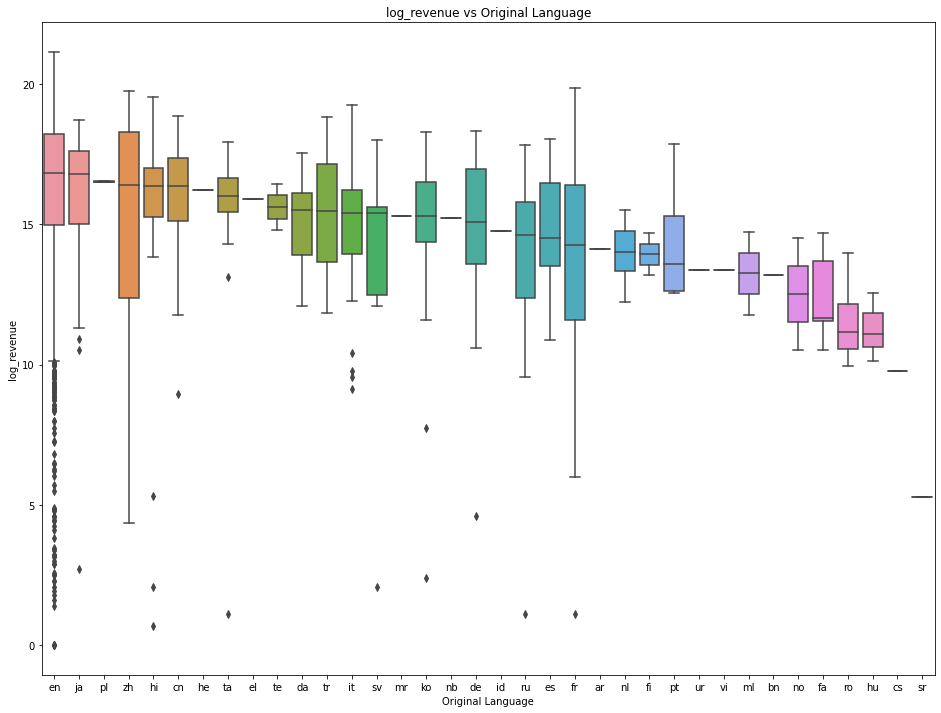

In [8]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df2)
plt.ylabel("log_revenue")
plt.xlabel('Original Language')
plt.title("log_revenue vs Original Language")

/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'log_revenue vs Movie Status')

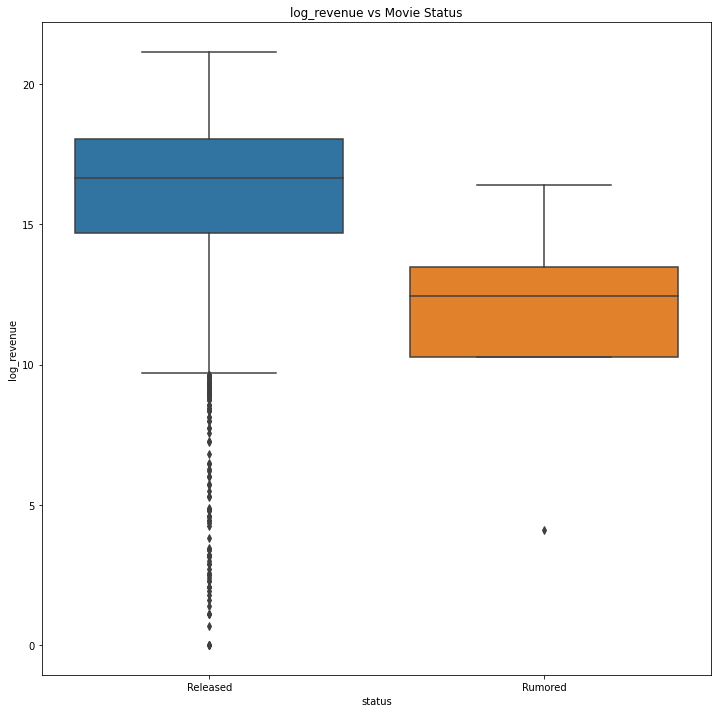

In [9]:
plt.figure(figsize=(12,12))
sns.boxplot(data.status,np.log(data.revenue))
plt.ylabel("log_revenue")
plt.title("log_revenue vs Movie Status")

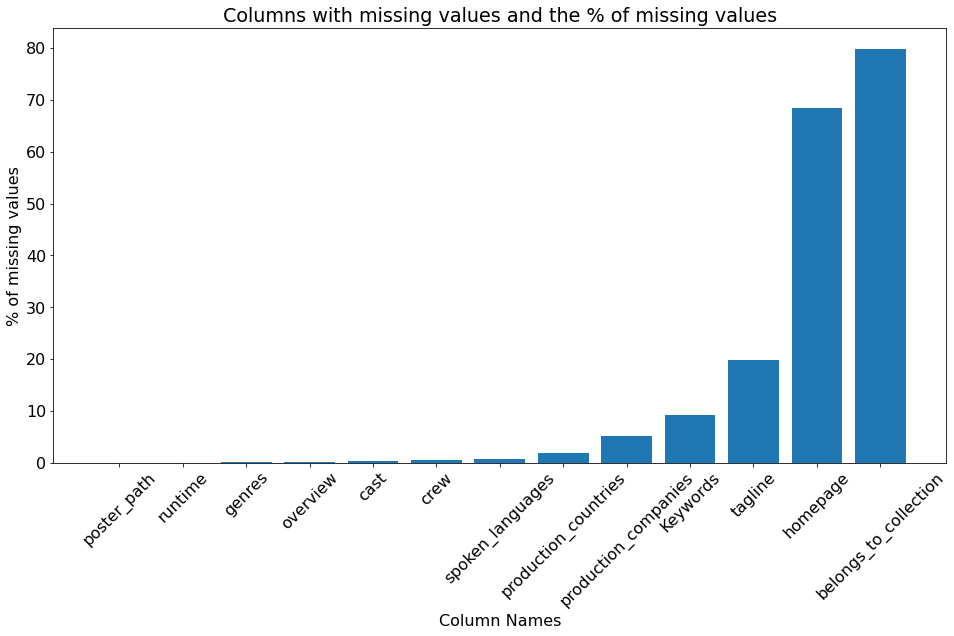

In [10]:
cols = data.columns
missing = list(data.isnull().sum())
missing_cols = []
missing_vals = []
for i in range(len(missing)):
    if missing[i] > 0:
        missing_cols.append(cols[i])
        missing_vals.append(missing[i]*100/len(data))


missing_vals, missing_cols = zip(*sorted(zip(missing_vals, missing_cols)))
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(16,8))
plt.bar(missing_cols,missing_vals)
plt.xlabel('Column Names')
plt.ylabel('% of missing values')
plt.title('Columns with missing values and the % of missing values')
plt.xticks(rotation=45)
plt.show()

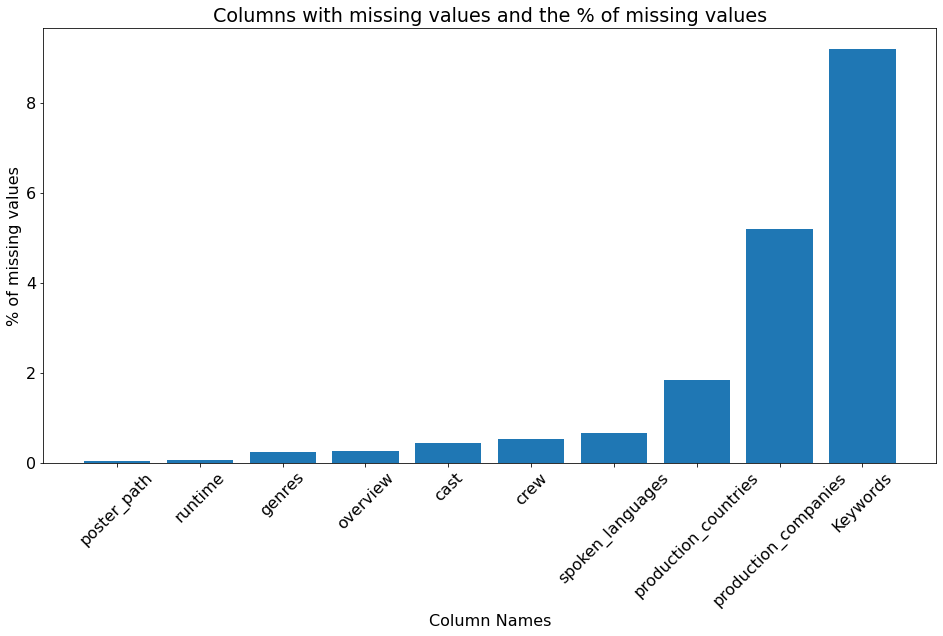

In [11]:
data1 = data.drop(columns=['belongs_to_collection','homepage','tagline'])
test = test.drop(columns=['belongs_to_collection','homepage','tagline'])

cols = data1.columns
missing = list(data1.isnull().sum())
missing_cols = []
missing_vals = []
for i in range(len(missing)):
    if missing[i] > 0:
        missing_cols.append(cols[i])
        missing_vals.append(missing[i]*100/len(data1))


missing_vals, missing_cols = zip(*sorted(zip(missing_vals, missing_cols)))
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(16,8))
plt.bar(missing_cols,missing_vals)
plt.xlabel('Column Names')
plt.ylabel('% of missing values')
plt.title('Columns with missing values and the % of missing values')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

### Dictionary Columns

In [12]:
def json_change(k):
    if type(k) == str:
        return ast.literal_eval(k)
    else:
        return k

In [13]:
data1.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [14]:
# Correcting the format of dictionary columns
dic_cols = ['genres', 'production_companies', 'production_countries',
            'spoken_languages', 'Keywords', 'cast', 'crew']

for c in dic_cols:
    data1[c] = data1[c].apply(lambda x: json_change(x))
    test[c] = test[c].apply(lambda x: json_change(x))

In [15]:
data1.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [16]:
# Creating lists out of dictionary
from tqdm.auto import tqdm
data2 = data1.copy()

data2['character'] = '0'
test['character'] = '0'
for c in dic_cols:
    # Dev data
    for i in range(len(data1)):
        temp = []
        character = []
        name = []
        try:
            for dic in data1[c].iloc[i]:
                if c == 'production_countries':
                    temp.append(dic['iso_3166_1'])
                elif c == 'spoken_languages':
                    temp.append(dic['iso_639_1'])
                elif c == 'cast':
                    character.append(dic['character'])
                    temp.append(dic['name'])
                else:
                    temp.append(dic['name'])
            data2[c].iloc[i] = temp
            if c == 'cast':
                data2['character'].iloc[i] = character
        except:
            continue
    
    # test data
    for i in range(len(test)):
        temp = []
        character = []
        name = []
        try:
            for dic in test[c].iloc[i]:
                if c == 'production_countries':
                    temp.append(dic['iso_3166_1'])
                elif c == 'spoken_languages':
                    temp.append(dic['iso_639_1'])
                elif c == 'cast':
                    character.append(dic['character'])
                    temp.append(dic['name'])
                else:
                    temp.append(dic['name'])
            test[c].iloc[i] = temp
            if c == 'cast':
                test['character'].iloc[i] = character
        except:
            continue

/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
# Creating train data
X_train = data2.drop(columns = ['id','poster_path','revenue'])
y = data2.revenue

In [18]:
X_train.head()

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,character
0,14000000,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],2/20/15,93.0,[en],Released,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...","[Lou, Nick, Jacob, Adam Jr., Hot Tub Repairman..."
1,40000000,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[US],8/6/04,113.0,[en],Released,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...","[Mia Thermopolis, Queen Clarisse Renaldi, Joe,..."
2,3300000,[Drama],tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],10/10/14,105.0,[en],Released,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...","[Andrew Neimann, Terence Fletcher, Nicole, Rya..."
3,1200000,"[Thriller, Drama]",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,[IN],3/9/12,122.0,"[en, hi]",Released,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]","[Vidya Bagchi, , , , , , ]"
4,0,"[Action, Thriller]",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,[KR],2/5/09,118.0,[ko],Released,Marine Boy,NaN,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]","[Chun-soo, Company president Kang, Yu-ri, Comp..."


In [19]:
test.drop(columns = ['id','poster_path'],inplace=True)
test.head()

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,character
0,0,"[Adventure, Animation, Family, Fantasy]",tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,NaN,"[JP, US]",7/14/07,90.0,"[en, ja]",Released,Pokémon: The Rise of Darkrai,"[pok√©mon, pocket monsters]","[Craig Blair, Emily Bauer, Sarah Natochenny, I...","[Kunihiko Yuyama, Hideki Sonoda]","[Tonio, Alice, Ash Ketchum, Pikachu, Darkrai, ..."
1,88000,"[Horror, Science Fiction]",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,[Woolner Brothers Pictures Inc.],[US],5/19/58,65.0,[en],Released,Attack of the 50 Foot Woman,"[revenge, alien, b movie, cheating husband, vi...","[Allison Hayes, William Hudson, Yvette Vickers...","[Edward Mann, Jacques R. Marquette, Jacques R....","[Nancy Fowler Archer, Harry Archer, Honey Park..."
2,0,"[Comedy, Romance]",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,"[Warner Bros., Outlaw Productions (I), Miramax]",[US],5/23/97,100.0,[en],Released,Addicted to Love,"[jealousy, love, revenge, break-up]","[Meg Ryan, Matthew Broderick, Kelly Preston, T...","[Griffin Dunne, Robert F. Newmyer, Jeffrey Sil...","[Maggie, Sam, Linda Green, Anton Depeux, Nana,..."
3,6800000,"[Drama, War, Mystery]",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,"[TS Productions, Micro scope, Phi Group]","[CA, FR]",9/4/10,130.0,"[fr, ar, en]",Released,Incendies,"[prison, middle east, rape, muslim, militia, i...","[Lubna Azabal, M√©lissa D√©sormeaux-Poulin, Ma...","[Louis Craig, Lucie Robitaille, Gilles Sacuto,...","[Nawal, Jeanne Marwan, Simon Marwan, le notair..."
4,2000000,"[History, Documentary]",tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,NaN,[US],2/11/05,92.0,[en],Released,Inside Deep Throat,"[usa, 1970s, sexual revolution, unsimulated sex]","[Dennis Hopper, Peter Bart, Warren Beatty, Car...","[Brian Grazer, Kim Roth, Ron Howard, Fenton Ba...","[Narrator (voice), Himself, Himself (archive f..."


### Date Columns

In [20]:
for i in range(len(X_train)):
    date = X_train.release_date.iloc[i].split('/')
    if int(date[2]) >= 20:
        to_fill = date[0]+'/'+date[1]+'/19'+date[2]
        X_train.release_date.iloc[i] = to_fill
    else:
        to_fill = date[0]+'/'+date[1]+'/20'+date[2]
        X_train.release_date.iloc[i] = to_fill

for i in range(len(test)):
    try:
        date = test.release_date.iloc[i].split('/')
        if int(date[2]) >= 20:
            to_fill = date[0]+'/'+date[1]+'/19'+date[2]
            test.release_date.iloc[i] = to_fill
        else:
            to_fill = date[0]+'/'+date[1]+'/20'+date[2]
            test.release_date.iloc[i] = to_fill
    except:
        continue

/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
from datetime import datetime

train_copy = X_train.copy()
test_copy = test.copy()
train_copy.release_date = pd.to_datetime(X_train.release_date)
test_copy.release_date = pd.to_datetime(test.release_date)
reference = datetime(2020,1,1)

In [22]:
train_copy['days_since_release'] = (reference - train_copy.release_date).dt.days
test_copy['days_since_release'] = (reference - test_copy.release_date).dt.days

In [23]:
train_copy['weekday'] = 0
train_copy['day'] = 0
train_copy['month'] = 0
train_copy['year'] = 0

test_copy['weekday'] = 0
test_copy['day'] = 0
test_copy['month'] = 0
test_copy['year'] = 0

for i in range(len(train_copy)):
    train_copy['weekday'].iloc[i] = train_copy.release_date[i].weekday()
    train_copy['day'].iloc[i] = train_copy.release_date[i].day
    train_copy['month'].iloc[i] = train_copy.release_date[i].month
    train_copy['year'].iloc[i] = train_copy.release_date[i].year
    
    
for i in range(len(test_copy)):
    test_copy['weekday'].iloc[i] = test_copy.release_date[i].weekday()
    test_copy['day'].iloc[i] = test_copy.release_date[i].day
    test_copy['month'].iloc[i] = test_copy.release_date[i].month
    test_copy['year'].iloc[i] = test_copy.release_date[i].year

In [24]:
train = train_copy.drop(columns=['release_date'])
test = test_copy.drop(columns=['release_date'])

In [25]:
train.weekday = train.weekday.astype("category")
test.weekday = test.weekday.astype("category")

train.day = train.day.astype("category")
test.day = test.day.astype("category")

train.month = train.month.astype("category")
test.month = test.month.astype("category")

In [26]:
train.head()

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,...,title,Keywords,cast,crew,character,days_since_release,weekday,day,month,year
0,14000000,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...","[Lou, Nick, Jacob, Adam Jr., Hot Tub Repairman...",1776,4,20,2,2015
1,40000000,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[US],113.0,...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...","[Mia Thermopolis, Queen Clarisse Renaldi, Joe,...",5626,4,6,8,2004
2,3300000,[Drama],tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,...,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...","[Andrew Neimann, Terence Fletcher, Nicole, Rya...",1909,4,10,10,2014
3,1200000,"[Thriller, Drama]",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,[IN],122.0,...,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]","[Vidya Bagchi, , , , , , ]",2854,4,9,3,2012
4,0,"[Action, Thriller]",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,[KR],118.0,...,Marine Boy,NaN,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]","[Chun-soo, Company president Kang, Yu-ri, Comp...",3982,3,5,2,2009


### Additional Feature Engineering

In [27]:
train['no_genres'] = 0 
train['no_companies'] = 0 
train['no_actors'] = 0
train['no_keywords'] = 0
train['no_countries'] = 0
train['no_crew'] = 0


for i in range(len(train)):
    try:
        train.no_genres.iloc[i] = len(train.genres.iloc[i])
    except:
        pass
    try:
        train.no_companies.iloc[i] = len(train.production_companies.iloc[i])
    except:
        pass
    try:
        train.no_actors.iloc[i] = len(train.cast.iloc[i])
    except:
        pass
    try:
        train.no_keywords.iloc[i] = len(train.Keywords.iloc[i])
    except:
        pass
    try:
        train.no_countries.iloc[i] = len(train.production_countries.iloc[i])
    except:
        pass
    try:
        train.no_crew.iloc[i] = len(train.crew.iloc[i])
    except:
        pass


test['no_genres'] = 0 
test['no_companies'] = 0 
test['no_actors'] = 0
test['no_keywords'] = 0
test['no_countries'] = 0
test['no_crew'] = 0
    
    
for i in range(len(test)):
    try:
        test.no_genres.iloc[i] = len(test.genres.iloc[i])
    except:
        pass
    try:
        test.no_companies.iloc[i] = len(test.production_companies.iloc[i])
    except:
        pass
    try:
        test.no_actors.iloc[i] = len(test.cast.iloc[i])
    except:
        pass
    try:
        test.no_keywords.iloc[i] = len(test.Keywords.iloc[i])
    except:
        pass
    try:
        test.no_countries.iloc[i] = len(test.production_countries.iloc[i])
    except:
        pass
    try:
        test.no_crew.iloc[i] = len(test.crew.iloc[i])
    except:
        pass
    


/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# temp = train.genres.copy()
# for i in range(len(temp)):
#     try:
#         for t in temp.iloc[i]:``
#             continue
#     except:
#         temp.iloc[i] = ['NaN']
# temp1 = mlb.fit_transform(temp)

In [29]:
train.budget = train.budget.replace(0,np.nan)
test.budget = test.budget.replace(0,np.nan)

train.budget = train.budget.apply(lambda x: np.log(x))
test.budget = test.budget.apply(lambda x: np.log(x))

y = y.apply(lambda x: np.log(x))

joint_data = pd.concat([train,y],axis=1)



## Pre-Processing Text Data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')

train.overview = train.overview.fillna(' ')
test.overview = test.overview.fillna(' ')

train_overview_sparse = tfidf.fit_transform(train.overview)
test_overview_sparse = tfidf.transform(test.overview)


# Convert the sparse matrix
col1 = []
for i in range(train_overview_sparse.shape[1]):
    col1.append("overview_" + str(i))
    
train_overview = pd.DataFrame(train_overview_sparse.toarray(), columns = col1)
train1 = pd.concat([train, train_overview], axis = 1)

test_overview = pd.DataFrame(test_overview_sparse.toarray(), columns = col1)
test1 = pd.concat([test, test_overview], axis = 1)

train1

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,...,overview_17147,overview_17148,overview_17149,overview_17150,overview_17151,overview_17152,overview_17153,overview_17154,overview_17155,overview_17156
0,16.454568,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.504390,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[US],113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.009433,[Drama],tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.997832,"[Thriller, Drama]",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,[IN],122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,"[Action, Thriller]",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,[KR],118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[Comedy, Romance]",tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,"[Warner Bros., Morgan Creek Productions]",[US],102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,NaN,"[Drama, Music]",tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,"[Memfis Film, Film i Väst]","[DK, SE]",102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,17.989898,"[Crime, Action, Mystery, Thriller]",tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[US],120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,17.553180,"[Comedy, Romance]",tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,"[Jersey Films, Loofah Productions]",[US],90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train = train1.copy()
test = test1.copy()

tfidf = TfidfVectorizer(stop_words = 'english')

train.original_title = train.original_title.fillna(' ')
test.original_title = test.original_title.fillna(' ')

train_original_title_sparse = tfidf.fit_transform(train.original_title)
test_original_title_sparse = tfidf.transform(test.original_title)


# Convert the sparse matrix
col1 = []
for i in range(train_original_title_sparse.shape[1]):
    col1.append("original_title_" + str(i))
    
train_original_title = pd.DataFrame(train_original_title_sparse.toarray(), columns = col1)
train2 = pd.concat([train, train_original_title], axis = 1)

test_original_title = pd.DataFrame(test_original_title_sparse.toarray(), columns = col1)
test2 = pd.concat([test, test_original_title], axis = 1)

train2

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,...,original_title_3533,original_title_3534,original_title_3535,original_title_3536,original_title_3537,original_title_3538,original_title_3539,original_title_3540,original_title_3541,original_title_3542
0,16.454568,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.504390,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[US],113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.009433,[Drama],tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.997832,"[Thriller, Drama]",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,[IN],122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,"[Action, Thriller]",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,[KR],118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[Comedy, Romance]",tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,"[Warner Bros., Morgan Creek Productions]",[US],102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,NaN,"[Drama, Music]",tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,"[Memfis Film, Film i Väst]","[DK, SE]",102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,17.989898,"[Crime, Action, Mystery, Thriller]",tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[US],120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,17.553180,"[Comedy, Romance]",tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,"[Jersey Films, Loofah Productions]",[US],90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train = train2.copy()
test = test2.copy()
train.drop(columns=['imdb_id','overview','original_title','title'],inplace=True)
test.drop(columns=['imdb_id','overview','original_title','title'],inplace=True)

## Categorical Variables

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
train_transformed = ohe.fit_transform(np.array(train.original_language).reshape(-1,1)).toarray()
test_transformed = ohe.transform(np.array(test.original_language).reshape(-1,1)).toarray()

train_data = pd.DataFrame(train_transformed,columns=ohe.get_feature_names())
test_data = pd.DataFrame(test_transformed,columns=ohe.get_feature_names())

train1 = pd.concat([train, train_data], axis = 1)
test1 = pd.concat([test, test_data], axis = 1)

train1

/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,...,x0_ro,x0_ru,x0_sr,x0_sv,x0_ta,x0_te,x0_tr,x0_ur,x0_vi,x0_zh
0,16.454568,[Comedy],en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,[en],Released,"[time travel, sequel, hot tub, duringcreditsst...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.504390,"[Comedy, Drama, Family, Romance]",en,8.248895,[Walt Disney Pictures],[US],113.0,[en],Released,"[coronation, duty, marriage, falling in love]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.009433,[Drama],en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,[en],Released,"[jazz, obsession, conservatory, music teacher,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.997832,"[Thriller, Drama]",hi,3.174936,NaN,[IN],122.0,"[en, hi]",Released,"[mystery, bollywood, police corruption, crime,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,"[Action, Thriller]",ko,1.148070,NaN,[KR],118.0,[ko],Released,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[Comedy, Romance]",en,9.853270,"[Warner Bros., Morgan Creek Productions]",[US],102.0,[en],Released,"[prison, sex, handcuffs, waitress, fight, fire...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,NaN,"[Drama, Music]",sv,3.727996,"[Memfis Film, Film i Väst]","[DK, SE]",102.0,[sv],Released,"[sweden, punk, based on comic, all girl band, ...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,17.989898,"[Crime, Action, Mystery, Thriller]",en,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[US],120.0,[en],Released,"[assassination, amnesia, hostage, chase, dark ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,17.553180,"[Comedy, Romance]",en,15.725542,"[Jersey Films, Loofah Productions]",[US],90.0,[en],Released,"[beach, honeymoon, bride, chance, risk, relati...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
train = train1.copy()
test = test1.copy()

ohe = OneHotEncoder(handle_unknown='ignore')
train_transformed = ohe.fit_transform(np.array(train.status).reshape(-1,1)).toarray()
test_transformed = ohe.transform(np.array(test.status).reshape(-1,1)).toarray()

train_data = pd.DataFrame(train_transformed,columns=ohe.get_feature_names())
test_data = pd.DataFrame(test_transformed,columns=ohe.get_feature_names())

train2 = pd.concat([train, train_data], axis = 1)
test2 = pd.concat([test, test_data], axis = 1)

train2

/Users/Abhimanyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,...,x0_sr,x0_sv,x0_ta,x0_te,x0_tr,x0_ur,x0_vi,x0_zh,x0_Released,x0_Rumored
0,16.454568,[Comedy],en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,[en],Released,"[time travel, sequel, hot tub, duringcreditsst...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17.504390,"[Comedy, Drama, Family, Romance]",en,8.248895,[Walt Disney Pictures],[US],113.0,[en],Released,"[coronation, duty, marriage, falling in love]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.009433,[Drama],en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,[en],Released,"[jazz, obsession, conservatory, music teacher,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.997832,"[Thriller, Drama]",hi,3.174936,NaN,[IN],122.0,"[en, hi]",Released,"[mystery, bollywood, police corruption, crime,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,NaN,"[Action, Thriller]",ko,1.148070,NaN,[KR],118.0,[ko],Released,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[Comedy, Romance]",en,9.853270,"[Warner Bros., Morgan Creek Productions]",[US],102.0,[en],Released,"[prison, sex, handcuffs, waitress, fight, fire...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,NaN,"[Drama, Music]",sv,3.727996,"[Memfis Film, Film i Väst]","[DK, SE]",102.0,[sv],Released,"[sweden, punk, based on comic, all girl band, ...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,17.989898,"[Crime, Action, Mystery, Thriller]",en,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[US],120.0,[en],Released,"[assassination, amnesia, hostage, chase, dark ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,17.553180,"[Comedy, Romance]",en,15.725542,"[Jersey Films, Loofah Productions]",[US],90.0,[en],Released,"[beach, honeymoon, bride, chance, risk, relati...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
train = train2.copy()
test = test2.copy()

train.drop(columns=['original_language','status'],inplace=True)
test.drop(columns=['original_language','status'],inplace=True)

train

,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,cast,crew,...,x0_sr,x0_sv,x0_ta,x0_te,x0_tr,x0_ur,x0_vi,x0_zh,x0_Released,x0_Rumored
0,16.454568,[Comedy],6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,[en],"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17.504390,"[Comedy, Drama, Family, Romance]",8.248895,[Walt Disney Pictures],[US],113.0,[en],"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.009433,[Drama],64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,[en],"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.997832,"[Thriller, Drama]",3.174936,NaN,[IN],122.0,"[en, hi]","[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,NaN,"[Action, Thriller]",1.148070,NaN,[KR],118.0,[ko],NaN,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[Comedy, Romance]",9.853270,"[Warner Bros., Morgan Creek Productions]",[US],102.0,[en],"[prison, sex, handcuffs, waitress, fight, fire...","[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...","[Dennis Hopper, Joe Batteer, John Rice, Joe Ba...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,NaN,"[Drama, Music]",3.727996,"[Memfis Film, Film i Väst]","[DK, SE]",102.0,[sv],"[sweden, punk, based on comic, all girl band, ...","[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...","[Imor Hermann, Anna Anthony, Lukas Moodysson, ...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,17.989898,"[Crime, Action, Mystery, Thriller]",14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[US],120.0,[en],"[assassination, amnesia, hostage, chase, dark ...","[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...","[Renny Harlin, Shane Black, Stephanie Austin, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,17.553180,"[Comedy, Romance]",15.725542,"[Jersey Films, Loofah Productions]",[US],90.0,[en],"[beach, honeymoon, bride, chance, risk, relati...","[Ben Stiller, Jennifer Aniston, Philip Seymour...","[Danny DeVito, Seamus McGarvey, Nick Moore, Th...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Additional Plots after Data Pre-Processing

In [36]:
joint_data.head()

,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,...,day,month,year,no_genres,no_companies,no_actors,no_keywords,no_countries,no_crew,revenue
0,16.454568,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],93.0,...,20,2,2015,1,3,24,4,1,72,16.326300
1,17.504390,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[US],113.0,...,6,8,2004,4,1,20,4,1,9,18.370959
2,15.009433,[Drama],tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],105.0,...,10,10,2014,1,3,51,12,1,64,16.387512
3,13.997832,"[Thriller, Drama]",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,[IN],122.0,...,9,3,2012,2,0,7,7,1,3,16.588099
4,NaN,"[Action, Thriller]",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,[KR],118.0,...,5,2,2009,2,0,4,0,1,2,15.182614


In [37]:
joint_data._get_numeric_data()

,budget,popularity,runtime,days_since_release,year,no_genres,no_companies,no_actors,no_keywords,no_countries,no_crew,revenue
0,16.454568,6.575393,93.0,1776,2015,1,3,24,4,1,72,16.326300
1,17.504390,8.248895,113.0,5626,2004,4,1,20,4,1,9,18.370959
2,15.009433,64.299990,105.0,1909,2014,1,3,51,12,1,64,16.387512
3,13.997832,3.174936,122.0,2854,2012,2,0,7,7,1,3,16.588099
4,NaN,1.148070,118.0,3982,2009,2,0,4,0,1,2,15.182614
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,9.853270,102.0,9385,1994,2,2,15,19,1,17,14.283441
2996,NaN,3.727996,102.0,2470,2013,2,2,11,6,2,15,12.103985
2997,17.989898,14.482345,120.0,8482,1996,4,3,15,14,1,10,18.309266
2998,17.553180,15.725542,90.0,5829,2004,2,2,26,22,1,89,18.962792


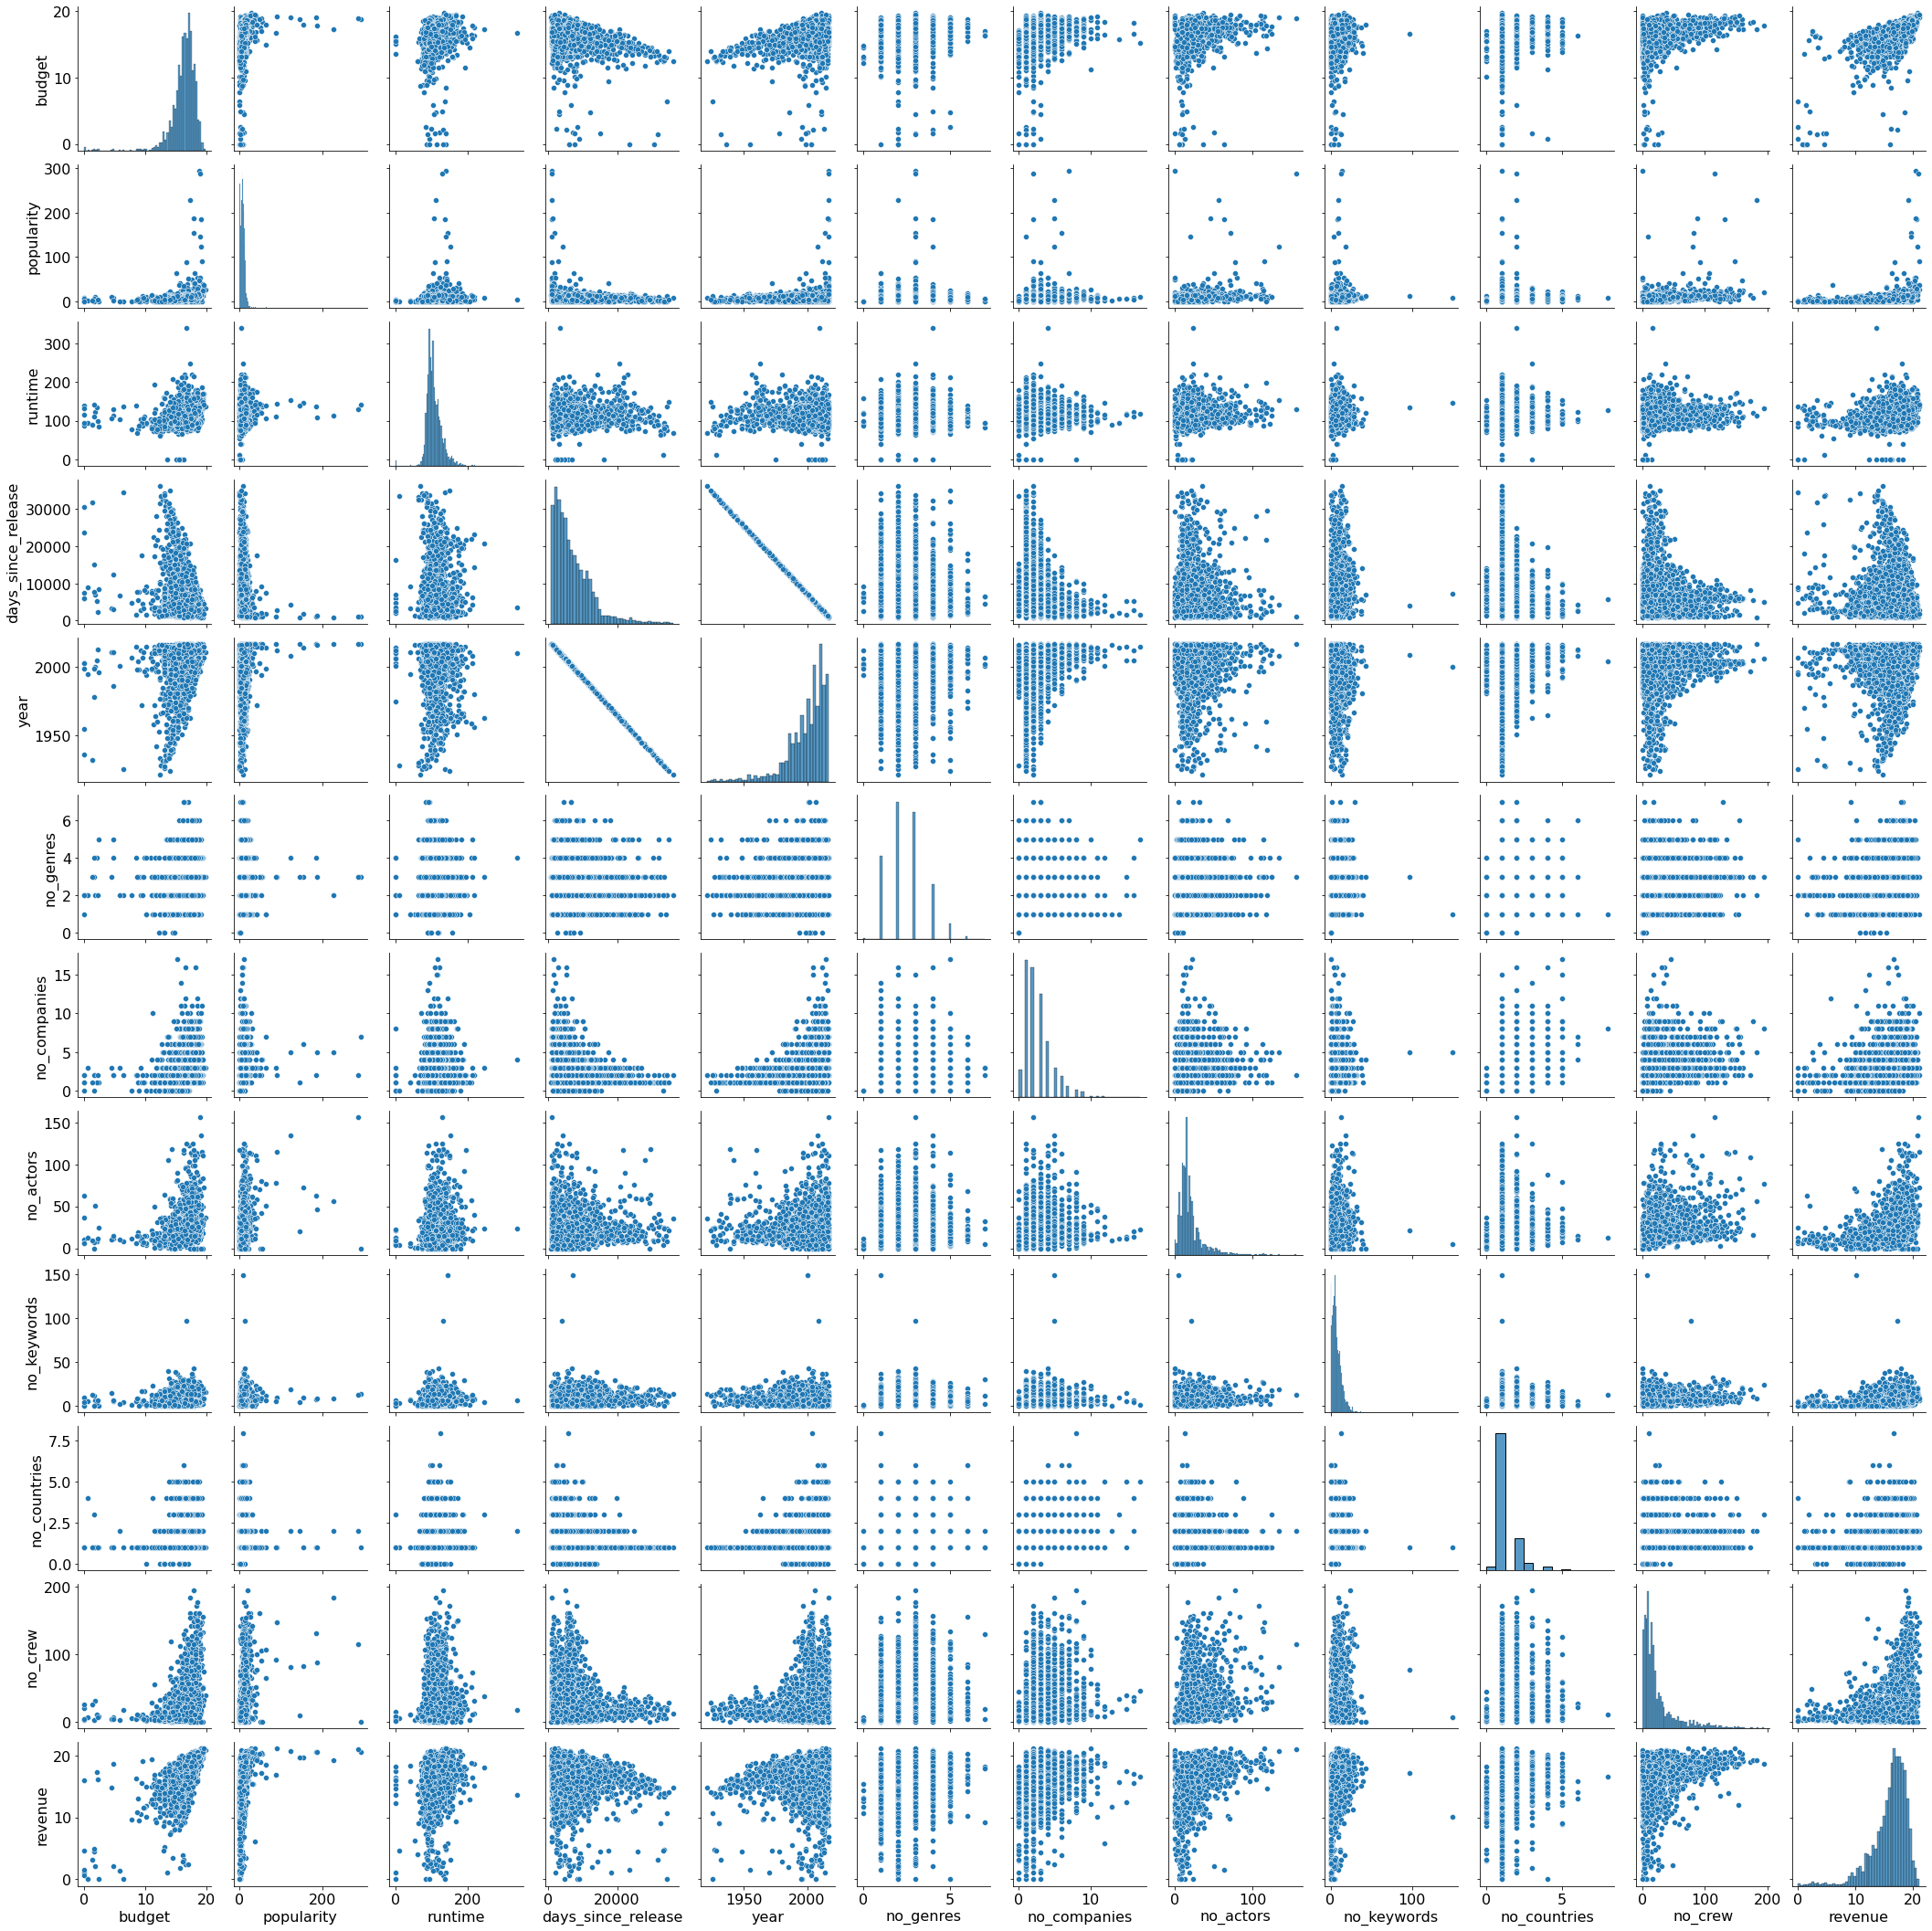

In [38]:
sns.pairplot(joint_data._get_numeric_data())

In [ ]:
corr = train._get_numeric_data().corr()
corr.style.background_gradient(cmap='coolwarm')